# Intro to dual-pol radar data
Also known as polarimetric, pol, etc.

We'll be using more Level 2 data for this case. The dual pol products are also contained in the Level 2 files, so no additional downloading is needed.

I already talked through some of the concepts in this notebook when we last met, so I'll skip the novel in this section, I think.
## Cases: 
* 2021-12-11 Mayfield, KY tornado
[File](https://noaa-nexrad-level2.s3.amazonaws.com/2021/12/11/KPAH/KPAH20211211_032349_V06)

* 2012-11-12 Northwestern Mississippi rain
[File](https://noaa-nexrad-level2.s3.amazonaws.com/2012/11/12/KGWX/KGWX20121112_071251_V07.gz)

## Concepts
* Correlation coefficient
* Differential Reflectivity
* Bright banding
* Tornado debris identification

# References
* [Summaries of dual pol products](https://www.weather.gov/jan/dualpolupgrade-products)
* [Correlation coefficient interpretation](http://research.atmos.ucla.edu/weather/C227/Documents/Radar_N0C_Interpret.pdf)
* [Differential reflectivity interpretation](http://research.atmos.ucla.edu/weather/C227/Documents/Radar_N0X_Interpret.pdf)
* [Bright band identification](https://www.weather.gov/jan/dualpolupgrade-applications)
* [Nice summary of what I gave you last time plus some additional useful info such as attenuation of radar pulses](http://research.atmos.ucla.edu/weather/C227/Documents/radar_meteorology_summary.pdf)

In [1]:
# imports
import pyart


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/Users/bethanyfay/miniconda3/envs/data_analysis/lib/python3.8/site-packages/pandas/util/testing.py:27: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import pandas._libs.testing as _testing
/Users/bethanyfay/miniconda3/envs/data_analysis/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Case 1: Tornado
### Part 1: Velocity and aliasing

In [2]:
mayfield = pyart.io.read('/Users/bethanyfay/Documents/bpsm/KPAH20211211_032349_V06')

In [3]:
mayfield.fields.keys()

dict_keys(['differential_phase', 'clutter_filter_power_removed', 'velocity', 'differential_reflectivity', 'cross_correlation_ratio', 'spectrum_width', 'reflectivity'])

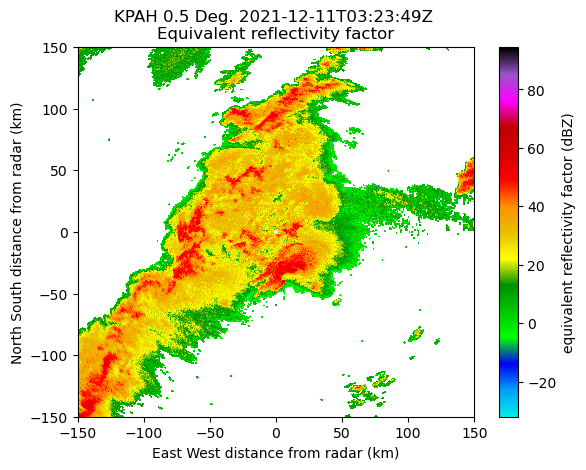

In [4]:
d = pyart.graph.RadarDisplay(mayfield)
d.plot_ppi('reflectivity', sweep=0, cmap='pyart_NWSRef')
d.set_limits((-150,150), (-150,150))

Just using this reflectivity plot, can you identify where a tornado might be present?

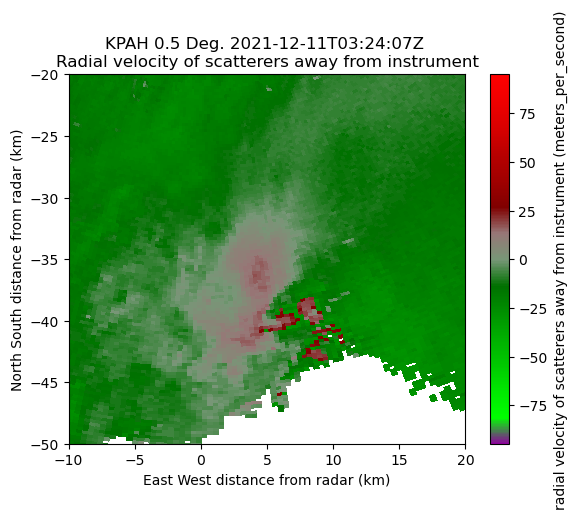

In [5]:
d = pyart.graph.RadarDisplay(mayfield)
d.plot_ppi('velocity', sweep=1, cmap='pyart_NWSVel')
d.set_limits((-10,20), (-50,-20))

Recall that rotation is indicated by bright greens (inbound velocities) next to bright reds (outbound velocities). Do you see any evidence of rotation here? Feel free to change the x and y limits of the plot (using the arguments to `d.set_limits()` above) to zoom in and out as needed.

_Aliasing_ or _velocity folding_ is when velocity in a certain radar gate exceeds the Nyquist velocity (for a refresher on Nyquist velocity, [see here](http://www.geosci.sfsu.edu/geosciences/classes/m415_715/Monteverdi/Radar/DopplerDilemma/DopplerDilemma.html)). This is a common problem with tornadoes. Do you see any evidence that aliasing might be occurring here?

Using the attributes of the pyart radar object, find the nyquist velocity at the same sweep where velocity data are present:

In [6]:
mayfield.extract_sweeps([1]).instrument_parameters['nyquist_velocity']['data']

array([30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05,
       30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05,
       30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05,
       30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05,
       30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05,
       30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05,
       30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05,
       30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05,
       30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05,
       30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05,
       30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05,
       30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05,
       30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05,
       30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05, 30.05,
       30.05, 30.05,

Given the above, what would a velocity of +40 m/s look like on this plot? What about -40 m/s?

Luckily, py-art has some handy methods for dealiasing velocity data. No dealiasing algorithm is perfect, unfortunately, but they are useful for demonstration purposes. We will compute dealiased velocity using a "region-based" algorithm here, but there are several others. If you see a warning for velocities outside the Nyquist interval, that's to be expected!

In [7]:
velocity_dealiased = pyart.correct.dealias_region_based(mayfield, vel_field='velocity', nyquist_centered=True)

/Users/bethanyfay/miniconda3/envs/data_analysis/lib/python3.8/site-packages/pyart/correct/region_dealias.py:287: UserWarning: Velocities outside of the Nyquist interval found in sweep 17.
  warnings.warn(msg, UserWarning)


In [8]:
# We need to add the corrected velocity to the `mayfield` radar object so we can plot it.
mayfield.add_field('corrected_velocity', velocity_dealiased, replace_existing=True)

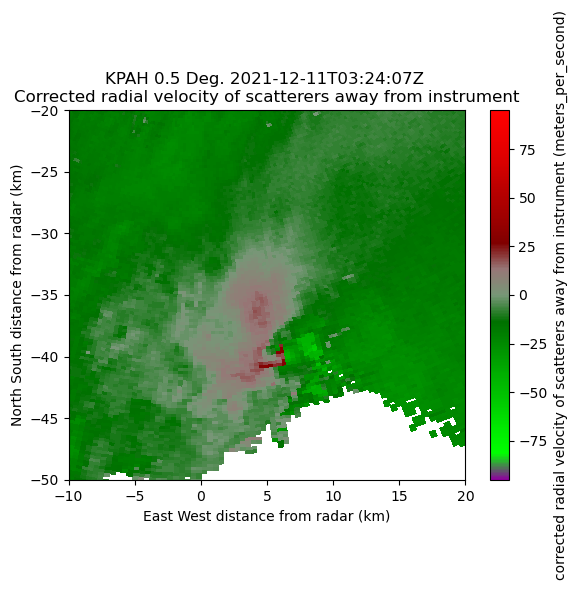

In [9]:
# this time we force the min and max of the colorbar to match the limits in the original velocity plot for comparison
d = pyart.graph.RadarDisplay(mayfield)
d.plot_ppi('corrected_velocity', sweep=1, cmap='pyart_NWSVel', vmin=-95, vmax=95)
d.set_limits((-10,20), (-50,-20))

Q: Do you notice differences here?

A: _your answer here_

### Part 2: Dual-pol data
While reflectivity and velocity are helpful, dual-pol data has been a game changer over the last decade for tornado detection. 
Correlation coefficient, or rhohv (h-horizontal, v-vertical), describes the correlation of the shapes of the targets to each other. High correlation values close to 1 means that on average the targets are roughly spherical, i.e. raindrops. Low correlation means the distribution is more random, which can indicate a number of things but tornado debris is one of them. Note: in the Level-2 data, it's called "cross_correlation_ratio", but the meaning is the same. 

Below, plot the "cross_correlation_ratio" variable (I suggest using the "gist_ncar" colormap, but you can use whatever you like). Where might tornado debris be found?

#### Correlation coefficient

Correlation coefficient, or rhohv (h-horizontal, v-vertical), describes the correlation of the shapes of the targets to each other. High correlation values close to 1 means that on average the targets are roughly spherical, i.e. raindrops. Low correlation means the distribution is more random, which can indicate a number of things but tornado debris is one of them. Note: in the Level-2 data, it's called "cross_correlation_ratio", but the meaning is the same. 

Below, plot the "cross_correlation_ratio" variable (I suggest using the "gist_ncar" colormap, but you can use whatever you like). 

Q: Where might tornado debris be found? Give a min/max lat and lon.

A: _your answer here_

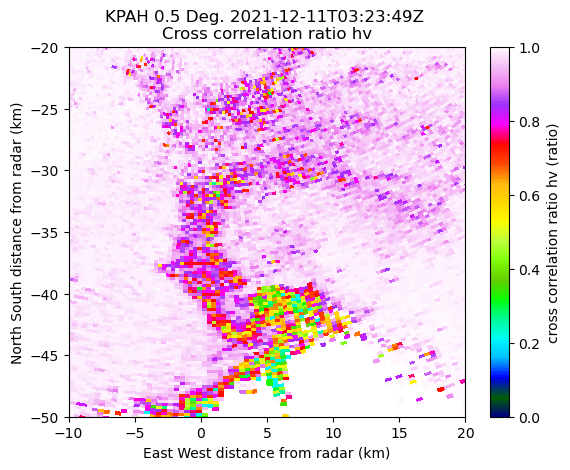

In [10]:
d = pyart.graph.RadarDisplay(mayfield)
d.plot_ppi('cross_correlation_ratio', sweep=0, cmap='gist_ncar')
d.set_limits((-10,20), (-50,-20))

We can also use rho to get an idea of how high tornado debris is thrown by looking at higher sweeps. Below is a plot of rho at the 3.1 degree sweep.

Q: Play around with plotting different sweeps below. What is the highest sweep, in degrees, where you can find evidence of tornado debris?

A: _your answer here_

Q: Using the pyart radar object method `get_gate_lat_lon_alt()`, what is the max altitude, in meters, at which you can find evidence of tornado debris? (we used this in the previous notebook)

A: _your answer here_


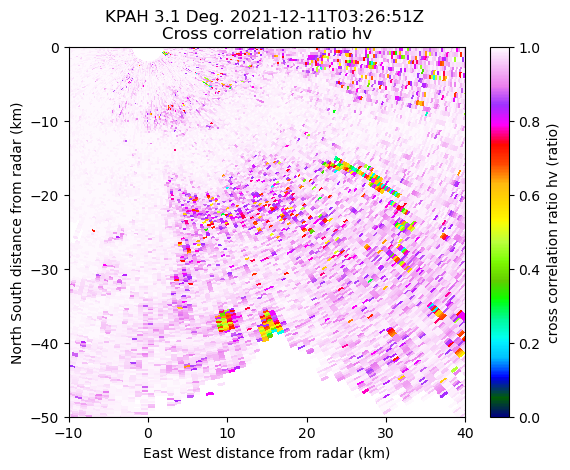

In [11]:
d = pyart.graph.RadarDisplay(mayfield)
d.plot_ppi('cross_correlation_ratio', sweep=10, cmap='gist_ncar')
d.set_limits((-10,40), (-50,0))

#### Gatefilters
Pyart has a neat feature called a gatefilter. Gatefilters allow us to exclude some values from our data, which can be useful. For instance, [rhohv values below 0.92 are often associated with tornado debris](https://journals.ametsoc.org/view/journals/apme/54/9/jamc-d-15-0138.1.xml?rskey=Y33AfY&result=5), so we can set a gatefilter to remove these values from our plots.

In [12]:
rhv_gatefilter = pyart.correct.GateFilter(mayfield)
rhv_gatefilter.exclude_above('cross_correlation_ratio', 0.92)

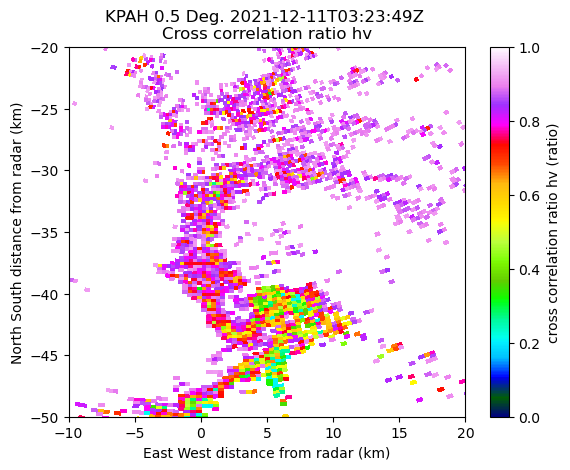

In [13]:
d = pyart.graph.RadarDisplay(mayfield)
d.plot_ppi('cross_correlation_ratio', sweep=0, cmap='gist_ncar', gatefilter=rhv_gatefilter)
d.set_limits((-10,20), (-50,-20))

And now we can see more clearly where debris might be present!

#### Differential reflectivity
Differential reflectivity, sometimes abbreviated ZDR, is a ratio of the power returned from the horizontal pulse to the power returned from the vertical pulse. If the ratio is high, targets are uniformly distributed; if it's low, they are randomly distributed. So in cases of things like tornado debris, we can expect low ZDR values as debris will be oriented randomly in the radar volume.

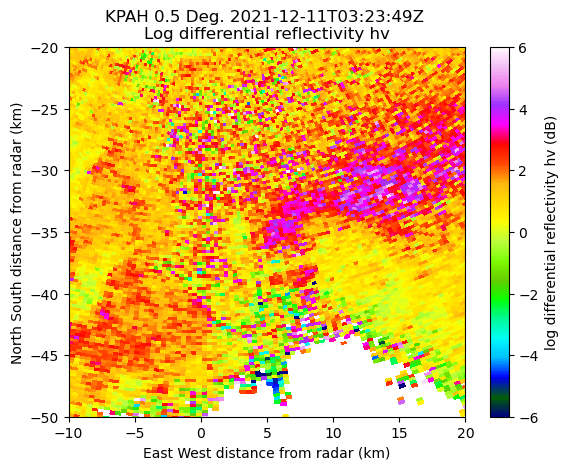

In [14]:

d = pyart.graph.RadarDisplay(mayfield)
d.plot_ppi('differential_reflectivity', sweep=0, cmap='gist_ncar', vmin=-6., vmax=6.)
d.set_limits((-10,20), (-50,-20))

According to the paper linked above in the rhv section, ZDR values can range from -2.5 to 2.5 dB for tornadic debris. We can use a gatefilter to see where debris might be.

In [15]:
zdr_gatefilter = pyart.correct.GateFilter(mayfield)
zdr_gatefilter.exclude_above('differential_reflectivity', 2.5)
zdr_gatefilter.exclude_below('differential_reflectivity', -2.5)

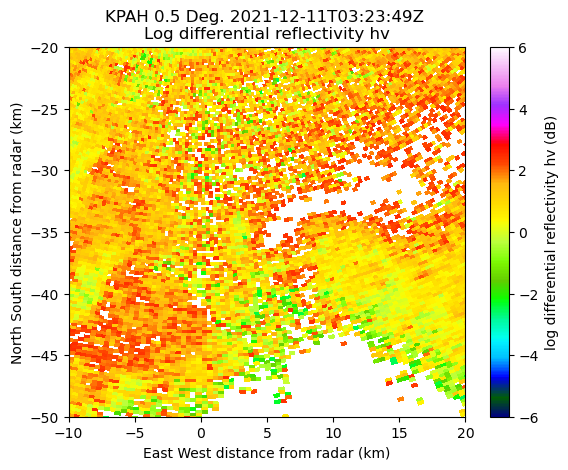

In [16]:
d = pyart.graph.RadarDisplay(mayfield)
d.plot_ppi('differential_reflectivity', sweep=0, cmap='gist_ncar', vmin=-6., vmax=6., gatefilter=zdr_gatefilter)
d.set_limits((-10,20), (-50,-20))

#### Differential phase ($\phi$dp)
The most difficult to interpret of the dual-pol radar products, differential phase is the difference between the horizonal and vertical phase shift. A more often used product is KDP, or _specific_ differential phase, which is the derivative of $\phi$dp (i.e. it represents the change in $\phi$dp) and can indicate a change in the number concentration of rain drops (i.e. can pinpoint where heavy rain is occurring). Unfortunately we only have $\phi$dp in our Level 2 radar files and Level 3 files are a bit more annoying to get - and py-ART doesn't play very nicely with some L3 files, including KDP. So you'll have to take my word for it. :)

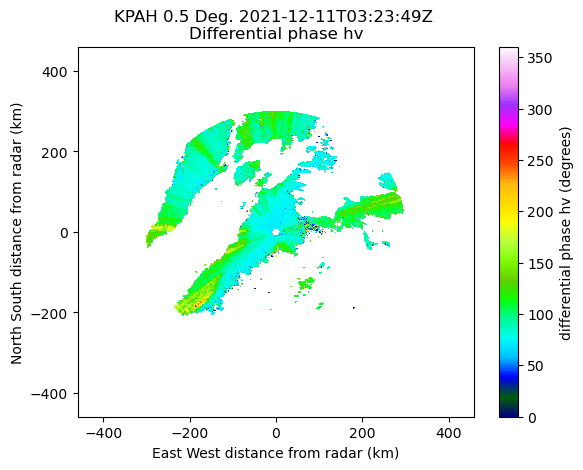

In [17]:
d = pyart.graph.RadarDisplay(mayfield)
d.plot_ppi('differential_phase', sweep=0, cmap='gist_ncar')

## Case 2: Bright Banding/Melting Layer
Dual pol data is good for identifying the melting layer. This often shows up as a "bright band" in reflectivity, i.e. a region of relatively high reflectivity.  Because the height of the radar beam increases with height, this works best when relatively close to the radar. 

In [18]:
brightband = pyart.io.read('/Users/bethanyfay/Documents/bpsm/KGWX20121112_071251_V07.gz')

At this time there was a cold front pushing through Mississippi (KGWX is in the northwestern part of Mississippi) causing some showers and thunderstorms. We can see that in the 0.5 degree (i.e. the sweep closest to the surface) reflectivity:

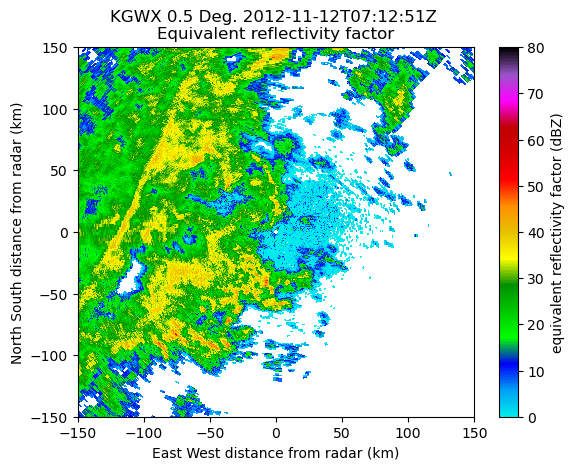

In [19]:
d = pyart.graph.RadarDisplay(brightband)
d.plot_ppi('reflectivity', sweep=0, vmin=0., vmax=80., cmap='pyart_NWSRef')
d.set_limits((-150,150), (-150,150))

Q: What is the wind direction west of the radar in the below velocity PPI? Is it changing with distance? If so, how?

A: _your answer here_

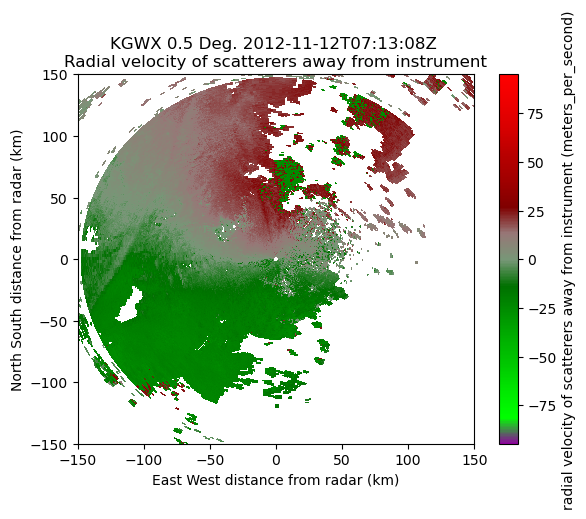

In [20]:
d = pyart.graph.RadarDisplay(brightband)
d.plot_ppi('velocity', sweep=1, cmap='pyart_NWSVel')
d.set_limits((-150,150), (-150,150))

Now because this is November in Mississippi, it's not snowing at the surface. Where is the melting layer? We should look above the surface to find it. Below is the reflectivity at the 4 degree tilt, i.e. where the radar beam is 4 degrees above the horizon. At this angle, the beam will likely detect the melting layer.

The melting layer can be seen in reflectivity as a "bright band", i.e. a region of high reflectivity compared to the surrounding areas. This occurs because when snowflakes start to melt, they are coated in water, so show up to the radar as giant raindrops. 

Q: At approximately what distance from the radar do you think the melting layer is located?

A: _your answer here_

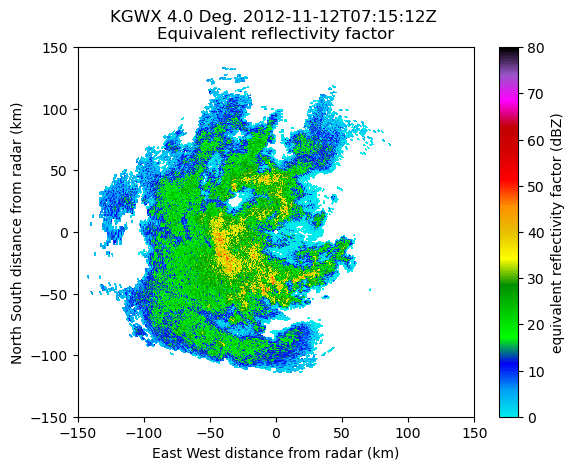

In [21]:
d = pyart.graph.RadarDisplay(brightband)
d.plot_ppi('reflectivity', sweep=9, vmin=0., vmax=80., cmap='pyart_NWSRef')
d.set_limits((-150,150), (-150,150))

While finding the melting layer from reflectivity is somewhat easy to find if you know you're looking for it, it's not necessarily very obvious at all times. Dual-pol to the rescue!

Recall that correlation coefficient shows how the sizes/shapes of the targets are correlated to each other. So if the particles are similarly shaped, rho is high, and the inverse is also true. In cases where snowflakes are melting, in any given gate (similar to a pixel in a photo), there will be snowflakes, half melted snowflakes, raindrops... lots of different shapes. In this area will rhv be high or low?

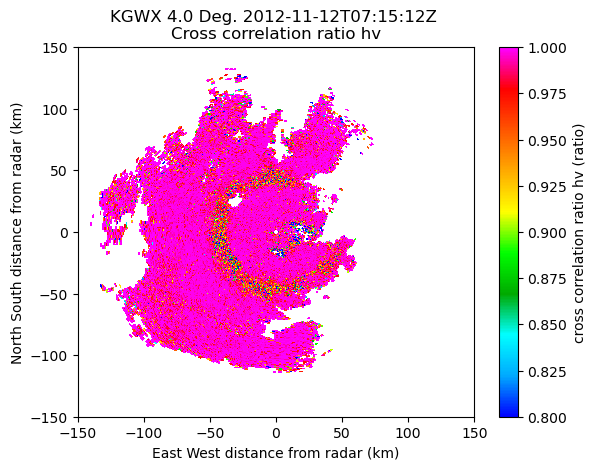

In [22]:
d = pyart.graph.RadarDisplay(brightband)
d.plot_ppi('cross_correlation_ratio', sweep=9, vmin=0.8, vmax=1.0)
d.set_limits((-150,150), (-150,150))

If you guessed low, you are correct! The shapes are not well correlated to each other in the melting layer/bright band, so rho is very helpful for identifying the melting layer/bright band. It shows up as a circle around the radar.

Bonus Q: Using the pyart function `get_gate_lat_lon_alt()`, determine the approximate altitude of the melting layer in meters. You can give a range or just a single value.

In [23]:
# insert your code to calculate melting layer altitude here